In [1]:
!pip install rake-nltk

In [2]:
import pandas as pd
import re

In [3]:
# 유튜브 크롤링 파일 로드
path = '/content/drive/MyDrive/Colab Notebooks/[공유] Mulcam_Army 공유폴더!/크롤링 한 자료/youtube/preprocesing_comment/'

In [4]:
comment_file = f'prepro_comments_youtube_aespa.csv'     #aespa
data = pd.read_csv(path+comment_file, encoding='utf-8', header=None)
data.columns = ['comment','like','lang']
print(len(data))
data.head()


13037


,comment,like,lang
0,months have passed and we still can ' t get ov...,453,(en)
1,i hope this gets nominated for soty it honestl...,90,(en)
2,if you attack aespa don ' t complain why mys a...,18,(en)
3,второй клип эспа почти достиг миллионов,9,(etc)
4,smtown : esta chida la canción de aespayo : si...,20,(es)


In [5]:
data_ko = pd.DataFrame([kor[:1] for kor in data.values if kor[2] == '(ko)'], columns=['comment'])
data_en = pd.DataFrame([en[:1] for en in data.values if en[2] == '(en)'], columns=['comment'])
data_en.comment.values

array(["months have passed and we still can ' t get over how next level is a masterpiece next level soty cutie 🤞",
       'i hope this gets nominated for soty it honestly deserves the title',
       "if you attack aespa don ' t complain why mys are toxic you started it first",
       ...,
       "those who commented ot fans are from other fandom trying to sabotage the mv ' s view count",
       'yass', 'you forgot the haters'], dtype=object)

In [6]:
for i in range(len(data_en.comment)):
    data_en.comment[i] = str(data_en.comment[i])


In [7]:
# 숫자제거 / 밑줄 제외한 특수문자 제거
p = re.compile("[0-9]+")
q = re.compile("\W+")
r = re.compile('[^a-zA-Z]+')

en = []
for i in data_en.comment.values:
    tokens = re.sub(p," ",i)
    tokens = re.sub(q," ",tokens)
    tokens = re.sub(r," ", tokens)
    en.append(tokens)
len(en)

10289

In [8]:
en[:2]

['months have passed and we still can t get over how next level is a masterpiece next level soty cutie ',
 'i hope this gets nominated for soty it honestly deserves the title']

In [9]:
# 불용어 제거
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [10]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [11]:
stop_words = set(stopwords.words('english')) 
stop_words.update(('song','group','songs','youtube','views','time','https','girl','girls','people','yes','lol'))

res=[]
for i in range(len(en)):
    word_tokens = word_tokenize(en[i])

    result = []
    for w in word_tokens: 
        if w not in stop_words: 
            result.append(w) 
    res.append(result)

# print(word_tokens) 
print(res[:10])
print(len(res))

[['months', 'passed', 'still', 'get', 'next', 'level', 'masterpiece', 'next', 'level', 'soty', 'cutie'], ['hope', 'gets', 'nominated', 'soty', 'honestly', 'deserves', 'title'], ['attack', 'aespa', 'complain', 'mys', 'toxic', 'started', 'first'], ['first', 'listen', 'confused', 'mixed', 'feelingssecond', 'listen', 'actually', 'kinda', 'understands', 'beatthird', 'listen', 'addicted'], ['fan', 'masterpiece'], ['something', 'aespa', 'makes', 'wan', 'na', 'comeback'], ['black', 'mamba', 'proves', 'danceforever', 'proves', 'singsmcu', 'proves', 'actnext', 'level', 'proves', 'rapstan', 'rounder', 'clear', 'skin'], ['next', 'level', 'yeahjeoldaejeok', 'rureul', 'jikyeonae', 'soneul', 'nochi', 'maragyeolsogeun', 'naui', 'mugigwangyaro', 'georeogaara', 'ne', 'home', 'groundwihyeobe', 'matseoseojekkyeora', 'jekkyeora', 'jekkyeorasangsangdo', 'mothan', 'black', 'outyuhogeun', 'gipgo', 'jinhae', 'hot', 'hot', 'matjabeun', 'soneul', 'nochyeonan', 'jeoldae', 'pogi', 'mothaei', 'next', 'leveljeo', 'n

In [12]:
en_pos = []
for i in range(len(res)):
    tokens_pos = nltk.pos_tag(res[i])
    en_pos.append(tokens_pos)
en_pos[:2]

[[('months', 'NNS'),
  ('passed', 'VBN'),
  ('still', 'RB'),
  ('get', 'VB'),
  ('next', 'JJ'),
  ('level', 'NN'),
  ('masterpiece', 'NN'),
  ('next', 'JJ'),
  ('level', 'NN'),
  ('soty', 'NN'),
  ('cutie', 'NN')],
 [('hope', 'NN'),
  ('gets', 'VBZ'),
  ('nominated', 'VBN'),
  ('soty', 'NN'),
  ('honestly', 'RB'),
  ('deserves', 'VBZ'),
  ('title', 'NN')]]

In [13]:
# 명사는 NN을 포함하고 있음을 알 수 있음
en_NN=[]
for i in range(len(en_pos)):
    NN_words = []
    for word, pos in en_pos[i]:
        if 'NN' in pos:
            NN_words.append(word)
    en_NN.extend(NN_words)
en_NN[:2]

['months', 'level']

In [14]:
#9. 빈도분석
from collections import Counter
c = Counter(en_NN) # input type should be a list of words (or tokens)
k = 20
print(c.most_common(k)) # 빈도수 기준 상위 k개 단어 출력

[('level', 1243), ('aespa', 722), ('winter', 517), ('sm', 444), ('mamba', 356), ('karina', 292), ('rap', 228), ('nan', 217), ('giselle', 201), ('part', 173), ('music', 169), ('jennie', 163), ('blackpink', 162), ('queen', 160), ('comeback', 153), ('love', 149), ('kpop', 141), ('x', 133), ('k', 130), ('velvet', 129)]


In [15]:
#wordclound
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

noun_text = ''
for word in en_NN:
    noun_text = noun_text +' '+word


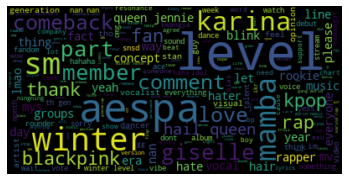

In [16]:
wordcloud = WordCloud(max_font_size=60, relative_scaling=.5).generate(noun_text) # generate() 는 하나의 string value를 입력 받음
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('/content/drive/MyDrive/Colab Notebooks/[공유] Mulcam_Army 공유폴더!/wordcloud_aespa.png')

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import sent_tokenize


In [18]:
## 3단어 이하 짧은 단어 제거
 # remove words less than three letters
# print(res[1])
# for word in res[1]:
#     print(word)
en_sent_less3=[]
for i in range(len(res)):
    tokens = [word for word in res[i] if len(word) >= 3]
    en_sent_less3.append(tokens)
en_sent_less3[:2]


[['months',
  'passed',
  'still',
  'get',
  'next',
  'level',
  'masterpiece',
  'next',
  'level',
  'soty',
  'cutie'],
 ['hope', 'gets', 'nominated', 'soty', 'honestly', 'deserves', 'title']]

In [19]:
en_sent =[]
for i in range(len(en_sent_less3)):
    temp=" ".join(en_sent_less3[i])
    en_sent.append(temp)
en_sent[:15]

['months passed still get next level masterpiece next level soty cutie',
 'hope gets nominated soty honestly deserves title',
 'attack aespa complain mys toxic started first',
 'first listen confused mixed feelingssecond listen actually kinda understands beatthird listen addicted',
 'fan masterpiece',
 'something aespa makes wan comeback',
 'black mamba proves danceforever proves singsmcu proves actnext level proves rapstan rounder clear skin',
 'next level yeahjeoldaejeok rureul jikyeonae soneul nochi maragyeolsogeun naui mugigwangyaro georeogaara home groundwihyeobe matseoseojekkyeora jekkyeora jekkyeorasangsangdo mothan black outyuhogeun gipgo jinhae hot hot matjabeun soneul nochyeonan jeoldae pogi mothaei next leveljeo neomeoui muneul yeoreonext levelneol gyeolgugen naega busyeonext levelkosmoe daeul ttaekkajinext leveljekkyeora jekkyeora jekkyeorala lala lala lala lai see evojeokdaejeogin gonangwa seulpeumeunneol deo popping jinhwasikyeothat naevis naevisyou lead followgamjeongdeu

In [20]:
"""# 빈도수 계산을 위한 텍스트 데이터 벡터화
 - BoW 단어를 특성 벡터로 변환
 - TF-IDF 를 사용하여 단어 적합성 평가
"""

# BoW 모델로 벡터화
count = CountVectorizer(ngram_range=(3,6),
                        max_df = .1,
                        max_features=5000, stop_words=None)
docs = en_sent
bag = count.fit_transform(docs)

In [21]:
# TF_IDF 벡터화

tfidf = TfidfVectorizer(ngram_range=(3,6), # 유니그램 바이그램으로 사용
                        min_df = 3, # 3회 미만으로 등장하는 토큰은 무시
                        max_df =0.95 # 많이 등장한 단어 5%의 토큰도 무시
                        )
docs_tf = tfidf.fit_transform(docs)

In [22]:
"""# 잠재 디리클레 할당을 사용한 토픽 모델링"""

# LDA 사용 (BoW 기반)
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components = 6,
                                random_state = 1,
                                learning_method = 'batch')

X_topics = lda.fit_transform(bag)

In [23]:
# 결과 분석을 위해 각 토픽 당 중요 단어 10개 출력 (BoW 기반)
n_top_word = 3
feature_name = count.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
  print("토픽 %d:" % (topic_idx+1))
  print([feature_name[i] for i in topic.argsort()[:-n_top_word - 1: -1]])

토픽 1:
['hail queen jennie', 'aespa next level', 'red velvet zimzalabim']
토픽 2:
['world high heels', 'run world high heels', 'gang run world high heels']
토픽 3:
['really next level', 'say next level', 'next level lyrics']
토픽 4:
['next level aespa', 'ningning red hair', 'giselle karina rap']
토픽 5:
['hail queen jennie', 'said next level', 'like next level']
토픽 6:
['red lightred velvet', 'got boyf red', 'got boyf red lightred']


In [24]:
# LDA 사용 (tf-idf 기반)
lda_tfidf = LatentDirichletAllocation(n_components = 6,
                                      random_state = 1,
                                      learning_method = 'batch')

X_topics = lda_tfidf.fit_transform(docs_tf)

In [25]:
# 결과 분석을 위해 각 토픽 당 중요 단어 10개 출력 (tf-idf 기반)
n_top_word = 3
feature_name = count.get_feature_names()
for topic_idx, topic in enumerate(lda_tfidf.components_):
  print("토픽 %d:" % (topic_idx+1))
  print([feature_name[i] for i in topic.argsort()[:-n_top_word - 1: -1]])


토픽 1:
['forever main vocalist next', 'black mamba proves danceforever proves singsmcu', 'every member everything talents member']
토픽 2:
['addicted winter next level pronunciation', 'genie flo melon hits', 'aespa update next level']
토픽 3:
['contact great hacker', 'great hacker gmail cybermicheal gmailcom whatsapp', 'aespa threat favs']
토픽 4:
['chakgak sogenaevis uri aedeureul bulleobwaaespaui next', 'gang run world high heels stop', 'chegeda chegeda chegeda']
토픽 5:
['bohemian rhapsody kpop', 'eehgyeolguk nan muneul yeoreogeu', 'groups like aespa']
토픽 6:
['exo moa dzy', 'black mamba know', 'black mamba lalalalalala']


##Rake_nltk 라이브러리

https://github.com/csurfer/rake-nltk


## Rake_nltk 이론적 배경


https://www.researchgate.net/publication/227988510_Automatic_Keyword_Extraction_from_Individual_Documents

In [26]:
from rake_nltk import Rake

In [27]:
# raw= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/[공유] Mulcam_Army 공유폴더!/크롤링 한 자료/youtube/영상별 댓글/comments_youtube_aespa.csv',header=None)
# raw.columns=['comments','likes']
# raw

In [28]:
en_sent[:10]

['months passed still get next level masterpiece next level soty cutie',
 'hope gets nominated soty honestly deserves title',
 'attack aespa complain mys toxic started first',
 'first listen confused mixed feelingssecond listen actually kinda understands beatthird listen addicted',
 'fan masterpiece',
 'something aespa makes wan comeback',
 'black mamba proves danceforever proves singsmcu proves actnext level proves rapstan rounder clear skin',
 'next level yeahjeoldaejeok rureul jikyeonae soneul nochi maragyeolsogeun naui mugigwangyaro georeogaara home groundwihyeobe matseoseojekkyeora jekkyeora jekkyeorasangsangdo mothan black outyuhogeun gipgo jinhae hot hot matjabeun soneul nochyeonan jeoldae pogi mothaei next leveljeo neomeoui muneul yeoreonext levelneol gyeolgugen naega busyeonext levelkosmoe daeul ttaekkajinext leveljekkyeora jekkyeora jekkyeorala lala lala lala lai see evojeokdaejeogin gonangwa seulpeumeunneol deo popping jinhwasikyeothat naevis naevisyou lead followgamjeongdeu

In [29]:
text=". ".join(en_sent)
# text

In [30]:
# # Uses stopwords for english from NLTK, and all puntuation characters by
# # default
# r = Rake()

# # Extraction given the text.
# r.extract_keywords_from_text(<text to process>)

# # Extraction given the list of strings where each string is a sentence.
# r.extract_keywords_from_sentences(<list of sentences>)

# # To get keyword phrases ranked highest to lowest.
# r.get_ranked_phrases()

# # To get keyword phrases ranked highest to lowest with scores.
# r.get_ranked_phrases_with_scores()

In [31]:
r=Rake()
r.extract_keywords_from_text(text)
r.get_ranked_phrases_with_scores()[:10]

[(35586.17900411171,
  'lyrics verse karina giselle next level yeahjeoldaejeok rureul jikyeonae soneul nochi mara gyeolsogeun naui mugigwangyaro georeogaara home groundwihyeobe matseoseojekkyeora jekkyeora jekkyeora pre chorus winter ningning ooh ooh ooh eehsangsangdo mothan black outyuhogeun gipgo jinhae hot hot ooh ooh ooh eehmatjabeun soneul nochyeonan jeoldae pogi mothae chorus karina ningning next leveljeo neomeoui muneul yeoreonext level neol gyeolgugen naega busyeonext level kosmoe daeul ttaekkajinext level jekkyeora jekkyeora jekkyeora refrain lala lala verse giselle karina ningning winter see evojeokdaejeogin gonangwa seulpeumeunneol deo popping jinhwasikyeothat naevis naevisyou lead followgamjeongdeureul baeun daeumwatch make outwatch work outwatch make outwatch work outwork work work bridge ningning winter gamdanghal eomneun jeolmangdonae mideumeul kkaeji mothae watch work deo apeun siryeoneul majadonan jabeun soneul nochi aneulge watch work interlude karina ningning winter 

In [32]:
r1=Rake()
r1.extract_keywords_from_sentences(en_sent)
r1.get_ranked_phrases_with_scores()[:10]

[(35586.17900411171,
  'lyrics verse karina giselle next level yeahjeoldaejeok rureul jikyeonae soneul nochi mara gyeolsogeun naui mugigwangyaro georeogaara home groundwihyeobe matseoseojekkyeora jekkyeora jekkyeora pre chorus winter ningning ooh ooh ooh eehsangsangdo mothan black outyuhogeun gipgo jinhae hot hot ooh ooh ooh eehmatjabeun soneul nochyeonan jeoldae pogi mothae chorus karina ningning next leveljeo neomeoui muneul yeoreonext level neol gyeolgugen naega busyeonext level kosmoe daeul ttaekkajinext level jekkyeora jekkyeora jekkyeora refrain lala lala verse giselle karina ningning winter see evojeokdaejeogin gonangwa seulpeumeunneol deo popping jinhwasikyeothat naevis naevisyou lead followgamjeongdeureul baeun daeumwatch make outwatch work outwatch make outwatch work outwork work work bridge ningning winter gamdanghal eomneun jeolmangdonae mideumeul kkaeji mothae watch work deo apeun siryeoneul majadonan jabeun soneul nochi aneulge watch work interlude karina ningning winter 

K-means써볼까?


In [33]:
# 텍스트 단어들의 어근 원형을 추출하기 위해 함수 생성
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import string

# Tf-idf 벡터화시키면서 cusotmized해준 토큰화+어근추출 방식 tokenizer인자에 넣어주기
# 벡터화시킬 Tf-idf 도구 옵션 추가해서 구축
# 1,2gram적용, 빈도수 0.05이하, 0.85이상의 빈도수 단어들 제거
tfidf_vect = TfidfVectorizer(ngram_range=(1,2),
                            min_df=0.05, max_df=0.85)
# fit_transform으로 위에서 구축한 도구로 텍스트 벡터화
ftr_vect = tfidf_vect.fit_transform(en_sent)

In [34]:
# K-means로 3개 군집으로 문서 군집화시키기
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, max_iter=10000, random_state=42)
# 비지도 학습이니 feature로만 학습시키고 예측
cluster_label = kmeans.fit_predict(ftr_vect)

# 군집화한 레이블값들을 document_df 에 추가하기
data_en['label'] = cluster_label
print(data_en.sort_values(by=['label']))

                                                 comment  label
5144         that is what sm is their song is futuristic      0
6349                           nct : resonaceexo : tempo      0
6348                       red velvet - really bad boy *      0
6347                                        that so cool      0
6346   @ pink gangsta in short f ( x ) discoreography...      0
...                                                  ...    ...
3061   this song explains their conceptnext level vis...      5
10065              they will ever reach blackpinks level      5
6143   the visuals the vocals the rap parts the chore...      5
6145   black mamba : everyone can danceforever : ever...      5
6534   ningning and winter vocals really shines here ...      5

[10289 rows x 2 columns]


In [35]:
# 문서의 feature(단어별) cluster_centers_확인해보자
cluster_centers = kmeans.cluster_centers_
print(cluster_centers.shape)
print(cluster_centers)
# shape의 행은 클러스터 레이블, 열은 벡터화 시킨 feature(단어들)

(6, 5)
[[0.         0.         0.         0.         0.        ]
 [0.11650071 0.54663537 0.03647895 0.54619516 0.56167266]
 [0.08142904 0.0089442  0.96288874 0.01756378 0.00351938]
 [0.99155199 0.01227616 0.00791114 0.00926478 0.00936884]
 [0.0946511  0.00766346 0.00463513 0.95871201 0.00702941]
 [0.12754991 0.94569369 0.         0.01043283 0.00441598]]


In [36]:
def get_cluster_details(cluster_model, cluster_data, feature_names,
                       cluster_num, top_n_features=5):
    cluster_details = {}
    # 각 클러스터 레이블별 feature들의 center값들 내림차순으로 정렬 후의 인덱스를 반환
    center_feature_idx = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    # 개별 클러스터 레이블별로 
    for cluster_num in range(cluster_num):
        # 개별 클러스터별 정보를 담을 empty dict할당
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # 각 feature별 center값들 정렬한 인덱스 중 상위 5개만 추출
        top_ftr_idx = center_feature_idx[cluster_num, :top_n_features]
        top_ftr = [feature_names[idx] for idx in top_ftr_idx]
        # top_ftr_idx를 활용해서 상위 5개 feature들의 center값들 반환
        # 반환하게 되면 array이기 떄문에 리스트로바꾸기
        top_ftr_val = cluster_model.cluster_centers_[cluster_num, top_ftr_idx].tolist()
        
        # cluster_details 딕셔너리에다가 개별 군집 정보 넣어주기
        cluster_details[cluster_num]['top_features'] = top_ftr
        cluster_details[cluster_num]['top_featrues_value'] = top_ftr_val
        # 해당 cluster_num으로 분류된 파일명(문서들) 넣어주기
        comment = cluster_data[cluster_data['label']==cluster_num]['comment']
        # filenames가 df으로 반환되기 떄문에 값들만 출력해서 array->list로 변환
        comment = comment.values.tolist()
        cluster_details[cluster_num]['comment'] = comment
    
    return cluster_details

def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print(f"#####Cluster Num: {cluster_num}")
        print()
        print("상위 5개 feature단어들:\n", cluster_detail['top_features'])
        print()
        print(f"Cluster {cluster_num}으로 분류된 문서들:\n{cluster_detail['comment'][:5]}")
        print('-'*20)

feature_names = tfidf_vect.get_feature_names()
cluster_details = get_cluster_details(cluster_model=kmeans,
                                     cluster_data=data_en,
                                     feature_names=feature_names,
                                     cluster_num=6,
                                     top_n_features=10)
print_cluster_details(cluster_details)

#####Cluster Num: 0

상위 5개 feature단어들:
 ['next level', 'next', 'like', 'level', 'aespa']

Cluster 0으로 분류된 문서들:
['i hope this gets nominated for soty it honestly deserves the title', 'first listen : confused and mixed feelingssecond listen : actually kinda understands the beatthird listen : addicted', 'not a fan but this song a masterpiece', "karina is not a human she ' s an angel", 'winter fans']
--------------------
#####Cluster Num: 1

상위 5개 feature단어들:
 ['next level', 'level', 'next', 'aespa', 'like']

Cluster 1으로 분류된 문서들:
["months have passed and we still can ' t get over how next level is a masterpiece next level soty cutie 🤞", "i ' m on the next level yeahjeoldaejeok rureul jikyeonae soneul nochi maragyeolsogeun naui mugigwangyaro georeogaara ne home groundwihyeobe matseoseojekkyeora jekkyeora jekkyeorasangsangdo mothan black outyuhogeun gipgo jinhae ( too hot too hot ) matjabeun soneul nochyeonan jeoldae pogi mothaei ' m on the next leveljeo neomeoui muneul yeoreonext levelneol 

In [37]:
data_en.head()

,comment,label
0,months have passed and we still can ' t get ov...,1
1,i hope this gets nominated for soty it honestl...,0
2,if you attack aespa don ' t complain why mys a...,3
3,first listen : confused and mixed feelingsseco...,0
4,not a fan but this song a masterpiece,0


In [40]:
# 클러스터링된 문서들 중에서 특정 문서를 하나 선택한 후 비슷한 문서 추출
from sklearn.metrics.pairwise import cosine_similarity


In [42]:

hotel_idx = data_en[data_en['label']==1].index
print("호텔 카테고리로 클러스터링된 문서들의 인덱스:\n",hotel_idx)
print()
# 호텔 카테고리로 클러스터링 된 문서들의 인덱스 중 하나 선택해 비교 기준으로 삼을 문서 선정
comparison_doc = data_en.iloc[hotel_idx[0]]['comment']
print("##유사도 비교 기준 문서 이름:",comparison_doc,'##')
print()

# 위에서 추출한 호텔 카테고리로 클러스터링된 문서들의 인덱스 중 0번인덱스(비교기준문서)제외한
# 다른 문서들과의 유사도 측정
similarity = cosine_similarity(ftr_vect[hotel_idx[0]], ftr_vect[hotel_idx])
print(similarity)


호텔 카테고리로 클러스터링된 문서들의 인덱스:
 Int64Index([    0,     7,    12,    13,    23,    26,    43,    48,    51,
               52,
            ...
            10152, 10160, 10195, 10223, 10224, 10226, 10234, 10239, 10242,
            10261],
           dtype='int64', length=938)

##유사도 비교 기준 문서 이름: months have passed and we still can ' t get over how next level is a masterpiece next level soty cutie 🤞 ##

[[1.         0.90404253 1.         1.         1.         1.
  1.         1.         1.         0.87068223 0.87068223 0.87068223
  0.87068223 1.         1.         1.         1.         0.87068223
  0.96234971 0.87068223 1.         1.         1.         0.87068223
  0.87068223 1.         0.87068223 1.         1.         0.87068223
  1.         0.87068223 1.         0.87068223 1.         0.94285989
  0.87068223 1.         0.83126698 0.87068223 1.         1.
  1.         1.         1.         1.         1.         0.87068223
  0.87068223 1.         1.         1.         1.         0.94283413
  1. 


길이 비교 937 937



Text(0.5, 1.0, "months have passed and we still can ' t get over how next level is a masterpiece next level soty cutie 🤞")

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129310 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129486 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129311 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65103 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129315 missing from current font.
  font

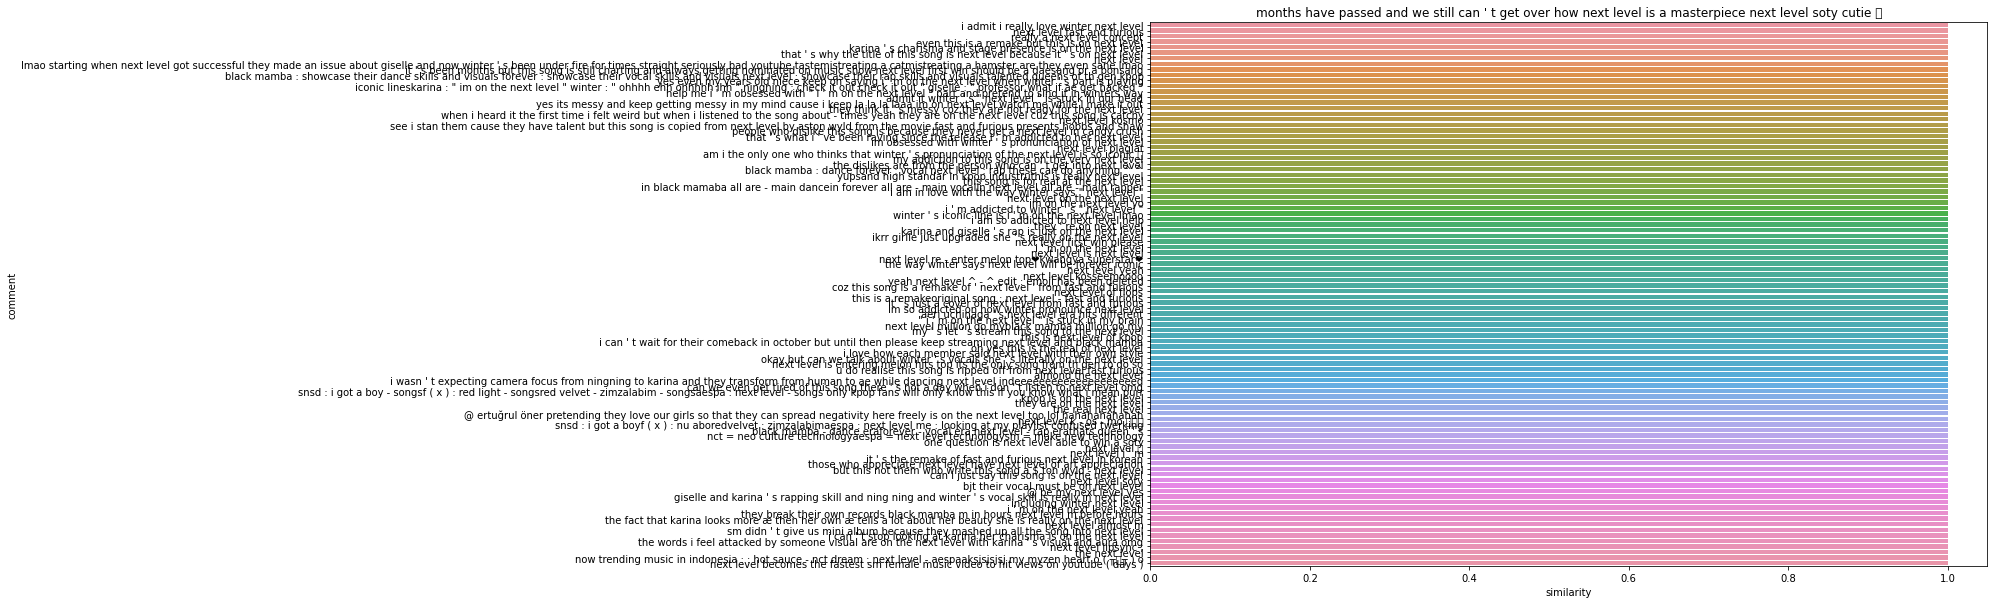

In [43]:
# 비교기준 문서와 다른 문서들간의 유사도 살펴보기
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# array 내림차순으로 정렬한 후 인덱스 반환 [:,::-1] 모든행에 대해서 열을 내림차순으로!
sorted_idx = similarity.argsort()[:,::-1]
# 비교문서 당사자는 제외한 인덱스 추출
sorted_idx = sorted_idx[:, 1:]

# 유사도가 큰 순으로 hotel_idx(label=1인 즉, 호텔과관련된 내용의 문서이름들의 index들)에서 재 정렬 
# index로 넣으려면 1차원으로 reshape해주기!
hotel_sorted_idx = hotel_idx[sorted_idx.reshape(-1,)]
# 유사도 행렬값들을 유사도가 큰 순으로 재정렬(비교 문서 당사자는 제외)
hotel_sim_values = np.sort(similarity.reshape(-1,))[::-1]
hotel_sim_values = hotel_sim_values[1:]
# 이렇게 되면 비교문서와 가장 유사한 순으로 '해당문서의index-유사도값' 으로 동일한 위치가 매핑된 두 개의 array!
# 그래서 그대로 데이터프레임의 각 칼럼으로 넣어주기
# print(hotel_sorted_idx)
# print(hotel_sim_values)
print()
print("길이 비교", len(hotel_sorted_idx), len(hotel_sim_values))
print()
# 빈 데이터프레임 생성
hotel_sim_df = pd.DataFrame()
# hotel_sorted_idx 와 hotel_sim_values 매핑시킨 array임
hotel_sim_df['comment'] = data_en.iloc[hotel_sorted_idx]['comment']
hotel_sim_df['similarity'] = hotel_sim_values

plt.figure(figsize=(15,10))
sns.barplot(data=hotel_sim_df[:100], x='similarity', y='comment')
plt.title(comparison_doc)

https://techblog-history-younghunjo1.tistory.com/114

Text Rank


Word2vec

In [44]:
import pandas as pd
import numpy as np
import glob
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from gensim.models.word2vec import Word2Vec

 

In [45]:
# # 데이터 읽어오기/벡터로 만들기
# pos_review = glob.glob("d:/deeplearning/textmining/pos/*.txt")[0:100]
# pos_lines = []
# for i in pos_review:
#      try:
#           f = open(i, "r")
#           temp = f.readlines()[0]
#           pos_lines.append(temp)
#           f.close
#      except Exception as e:
#           continue

 

# len(pos_lines)

In [53]:
# # 단어 추출하기
stop_words = stopwords.words("english")
tokenizer = RegexpTokenizer("[\w]+")

text = []
for line in en_sent:
     words = line.lower()
     tokens = tokenizer.tokenize(words)
     stopped_tokens = [i for i in list(set(tokens)) if not i in stop_words + ["br"]]
     stopped_tokens2 = [i for i in stopped_tokens if len(i) > 1]
     text.append(stopped_tokens2)

 

In [57]:
# word2vec 기반의 연관어 분석
model = Word2Vec(en_sent, sg = 1, window = 2, min_count = 3)
model.init_sims(replace = True)
model.wv.similarity("fire", "aespa")
model.wv.most_similar("good", topn = 10)

KeyError: ignored